In [1]:
import sys

sys.path.append("../..")

import numpy as np
import matplotlib.pyplot as plt
from scripts.neuralnetwork.led import LED

/home/daan/.anaconda3/envs/pacs/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Indicate the path of the dataset
path_data = "../../dataset/FN_testset/FN_testset_0.npz"

# Indicate the name of the pre-trained autoencoder
ae_name = "FN_autoencoder"

# Indicate the name of the pre-trained RNN
rnn_name = "FN_rnn"

# Indicate the desired length of the prediction (if higher than 800, you cannot compute the error because of the shape of the starting dataset)
length_prediction = 500

# Instantiate the LED object
led = LED(
    autoencoder_name=ae_name, rnn_name=rnn_name, length_prediction=length_prediction
)

In [3]:
# Upload the data
led.get_data(path_data, compressed_name="data")

In [4]:
# Run the LED
led.run()

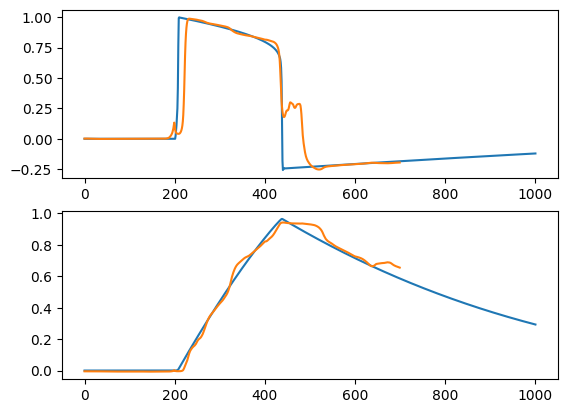

In [9]:
# Plot the true values and the predicted ones

# Choose the coordinates of the point you want to show
x = 19
y = 3

plt.subplot(211)
plt.plot(led.data[:, x, y, 0])
plt.plot(led.decoded_future[:, x, y, 0])
plt.subplot(212)
plt.plot(led.data[:, x, y, 1])
plt.plot(led.decoded_future[:, x, y, 1])
plt.show()

In [6]:
# Compute the error. You can specify the order of the norm (L2 norm by default)
err = led.compute_error()

0


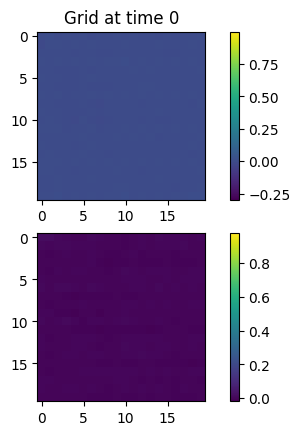

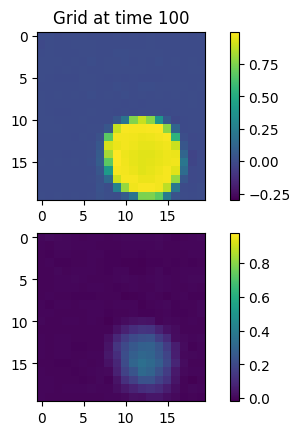

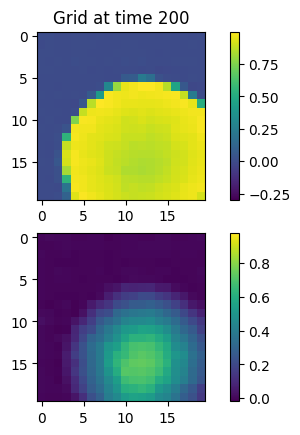

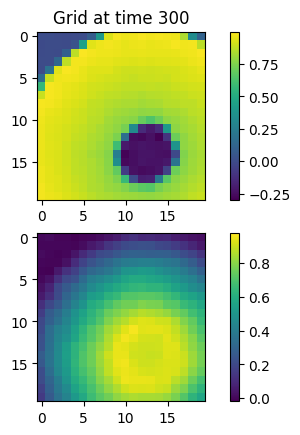

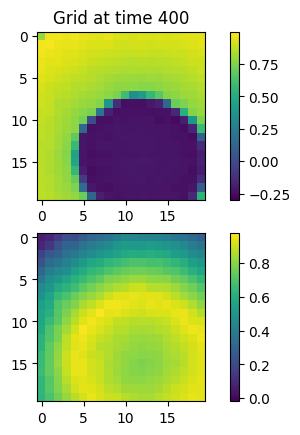

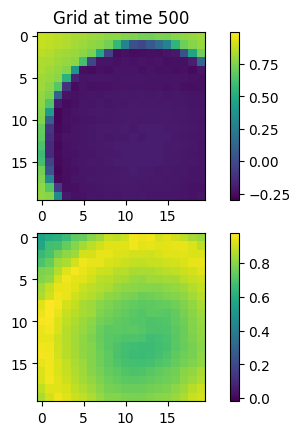

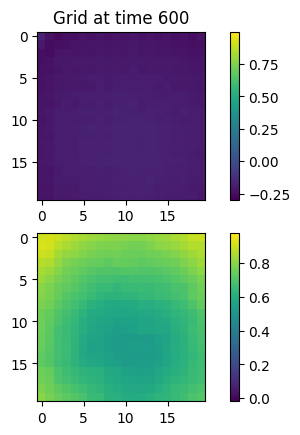

In [7]:
# Get the plot of the entire grid for one (or more) time step(s)
ret = led.get_snapshot([100 * i for i in range(7)], plot=True)

0


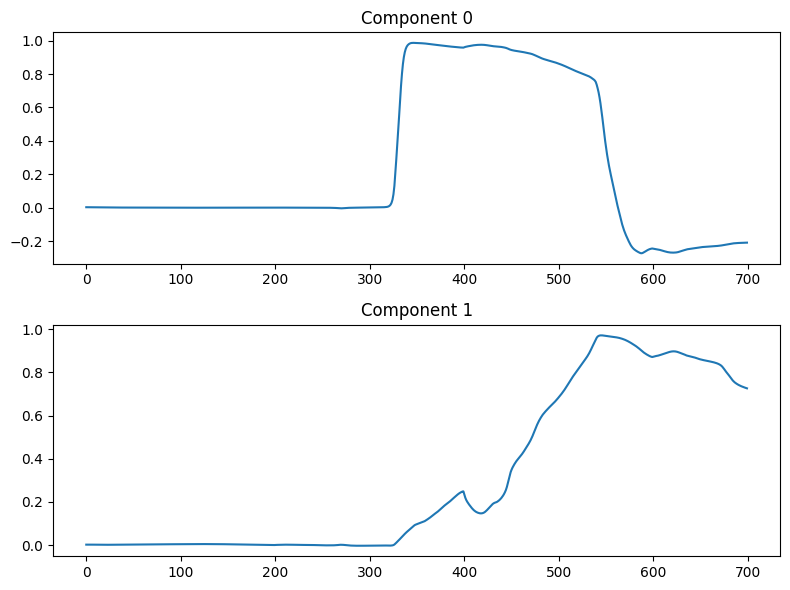

In [8]:
# Get the trend over time of the specified point of the grid
ret = led.get_particle(x=1, y=2, plot=True)